# Principal Component Analysis

Lembre-se de que o PCA é apenas uma transformação de seus dados para tentar descobrir quais caacterísticas explicam a maior variância em seu conjunto de dados. Por exemplo:

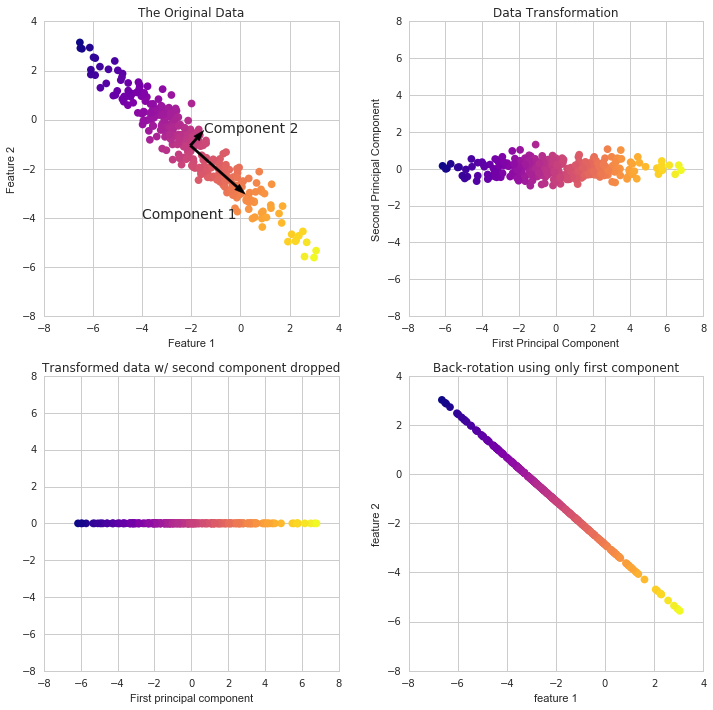

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Os dados

Vamos trabalhar com o conjunto de dados de câncer novamente, já que ele tem muitas características.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualização do PCA

Como notamos antes, é difícil visualizar dados de muitas dimensões. Podemos usar o PCA para encontrar os dois primeiros componentes principais e visualizar os dados neste novo espaço bidimensional, com um único gráfico de dispersão. Antes de fazermos isso, porém, precisaremos dimensionar nossos dados para que cada recurso tenha uma variância de uma única unidade.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [11]:
scaled_data = scaler.transform(df)

O PCA com Scikit Learn usa um processo muito semelhante a outras funções de pré-processamento fornecidas pelo SciKit Learn. Instanciamos um objeto PCA, localizamos os componentes principais usando o método fit e, em seguida, aplicamos a rotação e a redução de dimensionalidade chamando transform().

Também podemos especificar quantos componentes queremos manter ao criar o objeto PCA.

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

Agora podemos transformar esses dados em seus 2 primeiros componentes principais.

In [15]:
x_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape

(569, 30)

In [19]:
x_pca.shape

(569, 2)

Reduzimos 30 dimensões para apenas 2! Vamos plotar essas duas dimensões!

Text(0, 0.5, 'Segundo Componente Principal')

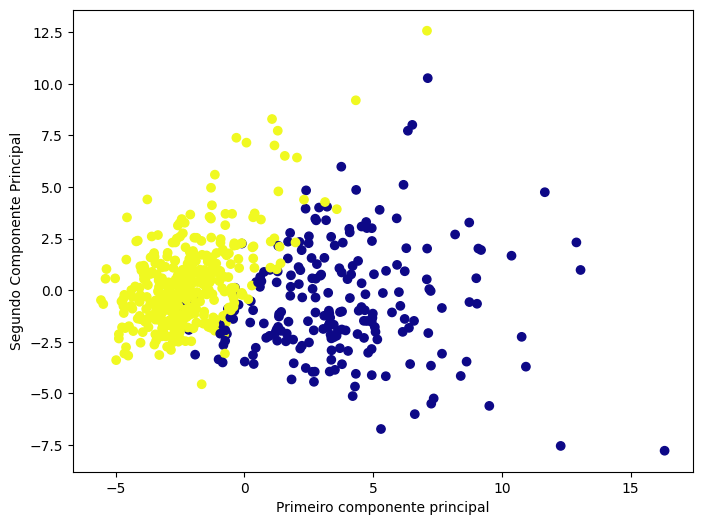

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo Componente Principal')

Claramente, usando esses dois componentes, podemos facilmente separar essas duas classes.

## Interpretando os componentes 

Infelizmente, com essa grande redução de dimensionalidade vem o custo de entender o que esses componentes representam.

Os componentes correspondem a combinações dos recursos originais, os próprios componentes são armazenados como um atributo do objeto PCA ajustado:

In [22]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Neste matriz numpy array, cada linha representa um componente principal e cada coluna se relaciona com os recursos originais. podemos visualizar essa relação com um mapa de calor:

In [23]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<Axes: >

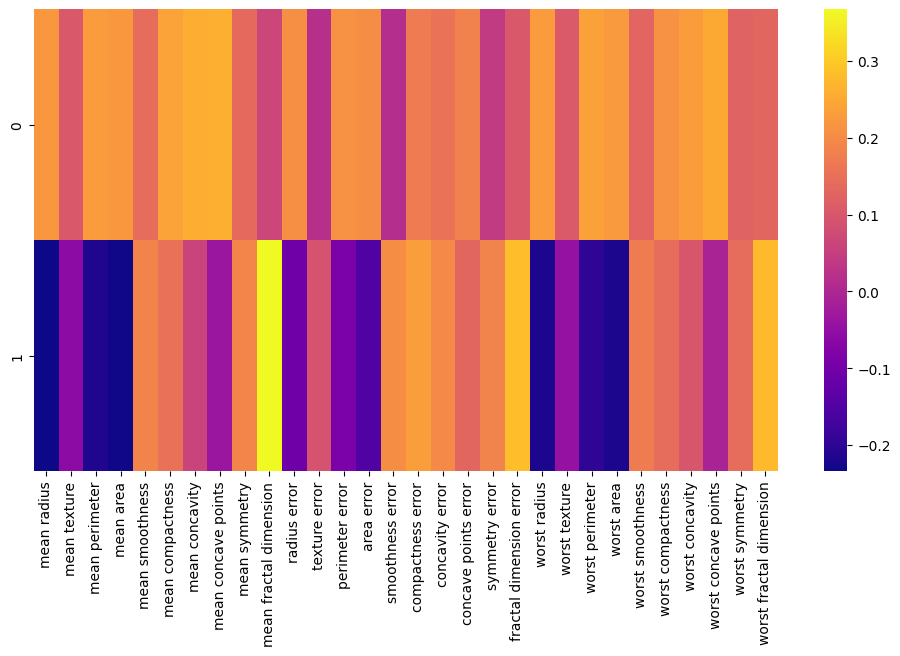

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

Este mapa de calor e a barra de cores representam, basicamente, a correlação entre os vários recursos e o próprio componente principal.